In [2]:
import sys
import os
import gzip
import shutil
import json
import pandas as pd
import _pickle as pickle
import numpy as np
%matplotlib inline

## Preprocess treatment data

In [3]:
### Interpreting json file
bg_path = '/home/jupyter/work/openaps/data/99908129/direct-sharing-31/entries_2017-01-01_to_2017-10-24.json'
df_bg = pd.read_json(bg_path)

In [78]:
# treat_path = '/home/jupyter/work/openaps/data/99908129/direct-sharing-31/treatments_2017-01-01_to_2017-10-24.json'
# df_treat = pd.read_json(treat_path)

In [7]:
df_bg_99908129 = pickle.load(open('data/df_bg_99908129.pkl', 'rb'))

In [8]:
df_bg_99908129.describe()

,sgv,hypo_t
count,55465.000000,55465.000000
mean,146.271306,1485.163707
std,56.461057,1870.999895
min,39.000000,0.000000
25%,104.000000,299.000000
50%,133.000000,829.000000
75%,177.000000,1899.000000
max,401.000000,12169.000000


In [9]:
df_bg_20396154 = pickle.load(open('data/entries_20396154_2.pkl', 'rb'))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xa1 in position 0: ordinal not in range(128)

In [31]:
df_bg.date.min()

Timestamp('2017-03-19 13:11:19')

In [7]:
df_bg.date.max()

Timestamp('2017-10-23 23:55:08')

In [101]:
cols=['date', 'sgv','type']
df_bg=df_bg[cols]

In [189]:
df_bg[df_bg.sgv<72].describe()

,sgv
count,1915.000000
mean,61.550914
std,7.859855
min,39.000000
25%,56.000000
50%,64.000000
75%,68.000000
max,71.000000


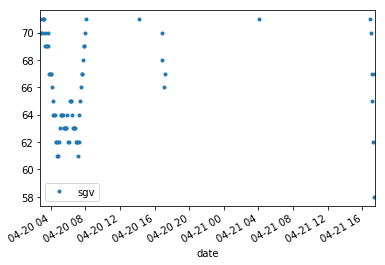

In [186]:
df_bg[df_bg.sgv<72]['2017-4-20':'2017-4-21'].plot(style = '.',y='sgv')

In [ ]:
df_bg = df_bg.set_index('date').sort_index()
df_bg.index

In [140]:
df_bg.describe()

,sgv
count,55465.000000
mean,146.271306
std,56.461057
min,39.000000
25%,104.000000
50%,133.000000
75%,177.000000
max,401.000000


In [51]:
## How many eventTypes are there
df_treat.eventType.unique()

array(['Temp Basal', 'Correction Bolus', 'Carb Correction',
       'Temporary Target', 'Note', 'Meal Bolus', 'BG Check',
       'Site Change', 'Insulin Change', '<none>', 'Sensor Start',
       'Sensor Change'], dtype=object)

In [179]:
df_treat[df_treat.eventType=='Meal Bolus'].describe()

,absolute,alarm_type,amount,bg,carb_input,carbs,duration,fixed,glucose,insulin,invalid,maxBasal,preBolus,ratio,tail,targetBottom,targetTop
count,0.0,0.0,0.0,397.000000,0.0,403.000000,403.0,0.0,399.000000,401.000000,0.0,0.0,1.0,399.000000,0.0,0.0,0.0
mean,NaN,NaN,NaN,116.037783,NaN,59.679901,0.0,NaN,115.882206,6.596883,NaN,NaN,15.0,8.535088,NaN,NaN,NaN
std,NaN,NaN,NaN,33.566775,NaN,29.617533,0.0,NaN,33.566834,3.297855,NaN,NaN,NaN,0.439589,NaN,NaN,NaN
min,NaN,NaN,NaN,55.000000,NaN,9.000000,0.0,NaN,55.000000,0.100000,NaN,NaN,15.0,7.500000,NaN,NaN,NaN
25%,NaN,NaN,NaN,90.000000,NaN,35.000000,0.0,NaN,90.000000,4.000000,NaN,NaN,15.0,8.500000,NaN,NaN,NaN
50%,NaN,NaN,NaN,111.000000,NaN,60.000000,0.0,NaN,111.000000,6.400000,NaN,NaN,15.0,8.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,135.000000,NaN,80.000000,0.0,NaN,135.000000,8.900000,NaN,NaN,15.0,9.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,229.000000,NaN,135.000000,0.0,NaN,229.000000,15.000000,NaN,NaN,15.0,9.200000,NaN,NaN,NaN


In [184]:
df_treat[df_treat.eventType == 'Temp Basal'].duration

date
2017-10-24 03:52:07    30.0
2017-10-24 03:47:41    30.0
2017-10-24 03:45:29    30.0
2017-10-24 03:45:28    30.0
2017-10-24 03:45:27    30.0
2017-10-24 03:29:13    30.0
2017-10-24 03:27:29    30.0
2017-10-24 03:24:08    30.0
2017-10-24 03:23:55    30.0
2017-10-24 03:13:25    30.0
2017-10-24 03:09:32    30.0
2017-10-24 02:53:04    30.0
2017-10-24 02:30:25    30.0
2017-10-24 02:12:38    30.0
2017-10-24 02:07:31    30.0
2017-10-24 01:45:35    30.0
2017-10-24 01:32:41    30.0
2017-10-24 01:28:42    30.0
2017-10-24 01:26:42    30.0
2017-10-24 01:22:22    30.0
2017-10-24 01:10:50    30.0
2017-10-24 00:34:23    30.0
2017-10-24 00:22:38    30.0
2017-10-24 00:07:30    30.0
2017-10-23 23:48:35    30.0
2017-10-23 23:28:52    30.0
2017-10-23 23:14:22    30.0
2017-10-23 23:01:33    30.0
2017-10-23 22:58:29    30.0
2017-10-23 22:56:36    30.0
                       ... 
2017-03-21 16:48:56    30.0
2017-03-21 09:11:29    30.0
2017-03-21 08:45:02    30.0
2017-03-21 01:45:50    30.0
2017-03-20 23:1

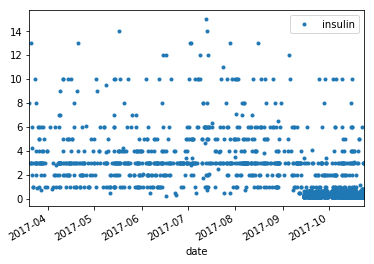

In [123]:
df_treat[df_treat.eventType == 'Correction Bolus'].plot(y='insulin', style='.')

In [11]:
df_treat['created_at'].min()

'2017-03-19T15:46:00-04:00'

In [68]:
df_treat['created_at'].max()

'2017-10-23T23:52:07-04:00'

In [82]:
df_treat['date']= pd.to_datetime(df_treat['created_at'], utc=True).astype('datetime64[ns]')

In [86]:
df_treat['date'].head()

0   2017-10-24 03:52:07
1   2017-10-24 03:47:41
2   2017-10-24 03:45:29
3   2017-10-24 03:45:28
4   2017-10-24 03:45:27
Name: date, dtype: datetime64[ns]

In [137]:
df_treat.columns

Index(['_body', '_date', '_description', '_head', '_id', '_type', 'absolute',
       'alarm_description', 'alarm_type', 'amount', 'appended', 'bg', 'bolus',
       'carb_input', 'carbs', 'changed', 'created_at', 'duration', 'enteredBy',
       'eventType', 'fixed', 'glucose', 'glucoseType', 'insulin', 'invalid',
       'maxBasal', 'medtronic', 'notes', 'preBolus', 'rate', 'ratio',
       'raw_duration', 'raw_rate', 'reason', 'stale', 'tail', 'targetBottom',
       'targetTop', 'timestamp', 'type', 'units', 'wizard'],
      dtype='object')

In [83]:
df_treat_stem= df_treat[['date','timestamp','eventType', 'bg', 'bolus', 'absolute', 'rate', 'duration','raw_duration', 'raw_rate']]

In [97]:
df_treat = df_treat.set_index('date')

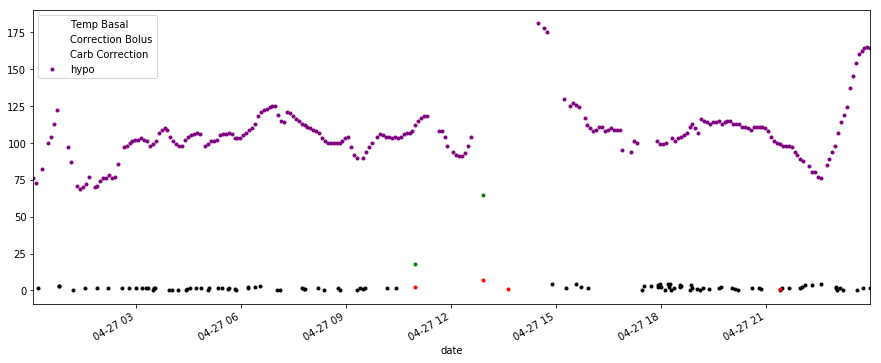

In [171]:
start = '2017-04-27 00:00'
end = '2017-04-28 00:00'

df_t_p = df_treat[start:end]

ax = df_t_p.plot(y='rate', style = '.',color = 'Black', label='Temp Basal', figsize=(15,6))
df_t_p.plot(y='insulin', style = '.', color='Red', label = 'Correction Bolus', figsize=(15,6), ax=ax)
df_t_p.plot(y='carbs', style = '.', color='Green', label = 'Carb Correction', figsize=(15,6), ax=ax)

df_b_p = df_bg[start:end]
df_b_p.plot(figsize=(15,6), style='.', y='sgv',ax=ax, label='hypo', color='Purple')

In [109]:
df_treat.head()

,_body,_date,_description,_head,_id,_type,absolute,alarm_description,alarm_type,amount,...,raw_rate,reason,stale,tail,targetBottom,targetTop,timestamp,type,units,wizard
date,,,,,,,,,,,,,,,,,,,,,
2017-10-24 03:52:07,NaN,NaN,NaN,NaN,59eeb94332c555f2c8abb01d,NaN,1.45,NaN,NaN,NaN,...,"{'temp': 'absolute', 'timestamp': '2017-10-23T...",NaN,NaN,NaN,NaN,NaN,2017-10-24 03:52:07,NaN,NaN,NaN
2017-10-24 03:47:41,NaN,NaN,NaN,NaN,59eeb80b32c555f2c8abab9d,NaN,3.45,NaN,NaN,NaN,...,"{'temp': 'absolute', 'timestamp': '2017-10-23T...",NaN,NaN,NaN,NaN,NaN,2017-10-24 03:47:41,NaN,NaN,NaN
2017-10-24 03:45:29,NaN,NaN,NaN,NaN,59eeb79632c555f2c8aba9dd,NaN,1.45,NaN,NaN,NaN,...,"{'temp': 'absolute', 'timestamp': '2017-10-23T...",NaN,NaN,NaN,NaN,NaN,2017-10-24 03:45:29,NaN,NaN,NaN
2017-10-24 03:45:28,NaN,NaN,NaN,NaN,59eeb79632c555f2c8aba9df,NaN,1.45,NaN,NaN,NaN,...,"{'temp': 'absolute', 'timestamp': '2017-10-23T...",NaN,NaN,NaN,NaN,NaN,2017-10-24 03:45:28,NaN,NaN,NaN
2017-10-24 03:45:27,NaN,NaN,NaN,NaN,59eeb79632c555f2c8aba9e1,NaN,1.45,NaN,NaN,NaN,...,"{'temp': 'absolute', 'timestamp': '2017-10-23T...",NaN,NaN,NaN,NaN,NaN,2017-10-24 03:45:27,NaN,NaN,NaN


In [46]:
df_treat.isnull().sum()

_body                22327
_date                22327
_description         22327
_head                22327
_id                      0
_type                22327
absolute              3889
alarm_description    23828
alarm_type           23828
amount               23014
appended             23827
bg                   23400
bolus                21662
carb_input           23816
carbs                23378
changed              23836
created_at               0
duration              1539
enteredBy                1
eventType                0
fixed                23686
glucose              22799
glucoseType          22799
insulin              21660
invalid              23842
maxBasal             23839
medtronic              170
notes                20712
preBolus             23842
rate                  3880
ratio                23398
raw_duration          3889
raw_rate              3889
reason               23674
stale                23836
tail                 23836
targetBottom         23740
t

In [ ]:
cols = ['created_at', 'eventType', 'rate']

In [3]:
def transfer_dataframe(patient_id, file_name):
    with open(file_name) as file:
        j_object = json.load(file)
        df = pd.DataFrame(j_object)
        try:
            df['datetime'] = pd.to_datetime(df['timestamp'], utc=True)
        except:
            print(df['timestamp'].head())
            return None
            
        df['pid'] = patient_id
        df.sort_values(by='datetime', inplace=True)
        df_result = df[['pid', 'datetime', 'eventType', 'insulin','carbs','absolute','rate','duration']]

    return df_result

In [5]:
## these samples have less data missing problems
samples = ['96254963', '57176789', '20396154', '00897741',
       '66836068', '66019205', '95851255', '97417885', '20216809',
       '47750728', '60844515', '37764532', '43589707', '14092221',
       '96805916', '95614431', '21946407', '37948668', '25692073',
       '99848889', '15634563', '80796147']  

In [ ]:
## merge treatment files person to person

count = 0
path = '/Users/wang/data/OpenAPS'
for folder in samples:
    print('PID:', folder)
    record_path = path + '/' +folder+'/direct-sharing-31'
    if os.path.exists(record_path):
        files = os.listdir(record_path)
        df_folder = pd.DataFrame([], columns=['pid', 'datetime', 'eventType', 'insulin','carbs','absolute','rate','duration'])
        for file in files:
            if file.find('treatments') > -1 and file.endswith('.json'):
                print('file', file)
                df = transfer_dataframe(folder, record_path+'/'+file)
                if df is None:
                    continue
                df_folder = df_folder.append(df)
#         print('before drop', len(df_folder))
#         df_folder.drop_duplicates('datetime',inplace = True)
#         print('after drop', len(df_folder))
#         print('saving result...')
        pickle.dump(df_folder, open(path + '/treat_dfs/'+folder+'_treats.pkl', 'wb'))
# z


In [ ]:
# Synthesize treatment with entries

path_treat = '/Users/wang/data/OpenAPS/treat_dfs'
path_entries = '/Users/wang/data/OpenAPS/entry_dfs'
start_date = '2018-01-01'
end_date = '2018-01-31'

dfs = []
for sample in samples:
    #treats
    df_t = pickle.load(open(path_treat+'/'+sample+'_treats.pkl', 'rb'))
    df_t.set_index('datetime', inplace=True)
    df_t = df_t.tz_convert(None)
    df_t_2018 = df_t[start_date:end_date]
    #bg entries
    df_e = pickle.load(open(path_entries+'/'+sample+'_entries.pkl', 'rb'))
    df_e.set_index('datetime', inplace=True)
    df_e = df_e.tz_convert(None)
    df_e_2018 = df_e[start_date:end_date]
    
    df_2018 = pd.merge(df_e_2018,df_t_2018, on = 'pid', how='left' )
    df_2018.sort_index(inplace = True)
    print(df_2018.head(3))
    dfs.append(df_2018)
    
dfs_all = pd.concat(dfs)
pickle.dump(df_folder, open('/Users/wang/data/OpenAPS/sample_entry_treats.pkl', 'wb'))


        pid    sgv eventType insulin carbs absolute rate duration
0  27700103  134.0       NaN     NaN   NaN      NaN  NaN      NaN
1  27700103  138.0       NaN     NaN   NaN      NaN  NaN      NaN
2  27700103  148.0       NaN     NaN   NaN      NaN  NaN      NaN
        pid    sgv   eventType  insulin  carbs  absolute rate  duration
0  96254963  165.0  Temp Basal      NaN    NaN       0.0    0      30.0
1  96254963  165.0  Temp Basal      NaN    NaN       0.0    0      60.0
2  96254963  165.0  Temp Basal      NaN    NaN       0.0    0      30.0
        pid  sgv   eventType  insulin  carbs  absolute rate  duration
0  57176789  118  Temp Basal      NaN    NaN       0.8  0.8      30.0
1  57176789  118  Temp Basal      NaN    NaN       1.2  1.2      30.0
2  57176789  118  Temp Basal      NaN    NaN       1.9  1.9      30.0
        pid  sgv   eventType  insulin  carbs  absolute  rate  duration
0  20396154  220  Temp Basal      NaN    NaN      0.00     0       0.0
1  20396154  220  Temp Bas

In [22]:
dfs_all['duration'].describe()

count    1.645022e+07
mean     3.332370e+01
std      4.195641e+01
min      0.000000e+00
25%      3.000000e+01
50%      3.000000e+01
75%      3.000000e+01
max      7.200000e+02
Name: duration, dtype: float64

In [45]:
treats_df.columns

Index(['absolute', 'carbs', 'eventType', 'glucose', 'insulin', 'notes', 'pid',
       'rate', 'ratio'],
      dtype='object')

In [23]:
treats_df['eventType'].unique()

NameError: name 'treats_df' is not defined

In [44]:
entries_df.describe()

,pid,sgv
count,336123,334934.0
unique,41,373.0
top,74077367,110.0
freq,16951,3628.0


In [ ]:
df_2018_1 = pd.merge(treats_df, entries_df, on='pid')